In [1]:
import safe as sf
import datamol as dm

/nas/longleaf/home/shuhang/miniconda3/envs/f-rag/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Ensure safe-mol is installed: pip install safe-mol or conda install -c conda-forge safe-mol
from safe.trainer.model import SAFEDoubleHeadsModel
from safe.tokenizer import SAFETokenizer

# Load the specific SAFE tokenizer and model
tokenizer = SAFETokenizer.from_pretrained("datamol-io/safe-gpt")
model = SAFEDoubleHeadsModel.from_pretrained("datamol-io/safe-gpt")

/nas/longleaf/home/shuhang/miniconda3/envs/f-rag/lib/python3.10/site-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [3]:
# Load the default pre-trained safe-gpt model
designer = sf.SAFEDesign.load_default(verbose=True)

## Scaffold Decoration

In [4]:
import os

scaffold = "[*]N-c1ccc2ncnc(-N[*])c2c1" # Example scaffold with attachment points [*]]

# Set TOKENIZERS_PARALLELISM to false explicitly
os.environ["TOKENIZERS_PARALLELISM"] = "false"

# Validate the scaffold has attachment points marked with [*]
assert "[*]" in scaffold, "Scaffold must contain attachment points marked with [*]"

with dm.without_rdkit_log():
    generated_smiles = designer.scaffold_decoration(
        scaffold=scaffold,
        n_samples_per_trial=12,
        n_trials=2,
        sanitize=True
    )

print(generated_smiles)
# Example output: ['Cc1ccc(Nc2ncnc3cc(N[C@H]4CC[C@H](C(=O)O)CC4)ccc23)cc1', ...]

  0%|          | 0/2 [00:00<?, ?it/s]/nas/longleaf/home/shuhang/miniconda3/envs/f-rag/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:453: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
2025-06-27 16:29:25.394 | INFO     | safe.sample:scaffold_decoration:635 - After sanitization, 24 / 24 (100.00 %)  generated molecules are valid !


['c1nc(N[n+]2cc[nH]c2)c2cc(NN=C3CCOCC3)ccc2n1', 'C[Si](O)(Nc1ncnc2ccc(Nn3ncc4ccc(I)cc4c3=O)cc12)C(F)(F)F', 'NCCS(=O)(=O)Nc1ncnc2ccc(NN=c3cncc[nH]3)cc12', 'N=CC(=O)Nc1ncnc2ccc(N[Si](N)(N)N)cc12', 'NS(=O)(=O)ONc1ncnc2ccc(NN=O)cc12', 'O=C([O-])C=NNc1ccc2ncnc(NN=CC(=O)[O-])c2c1', 'N=C(NNc1ccc2ncnc(NC(CO)CO)c2c1)C(F)(F)F', '[NH2+]=CNNc1ncnc2ccc(NC(=O)C(F)(F)C(F)(F)F)cc12', 'OCCI(CCO)Nc1ncnc2ccc(NNCC(F)(F)F)cc12', 'NC(=S)NNc1ccc2ncnc(NCC(F)F)c2c1', 'N=C(S)NNc1ccc2ncnc(NNC(=N)S)c2c1', 'N[S+]([O-])CCCNc1ncnc2ccc(NNCCCCC(=O)[O-])cc12', 'O=C([O-])Nc1ncnc2ccc(NNC(=O)C(=O)[O-])cc12', 'N=C(NNc1ncnc2ccc(NCC(F)(F)F)cc12)N[N+](=O)[O-]', 'NCCS(=O)(=O)Nc1ncnc2ccc(Nn3ccnc3)cc12', 'O=C([O-])CS(=O)(=O)Nc1ncnc2ccc(NP(=O)([O-])O)cc12', 'FCCCCCNc1ccc2ncnc(N/N=C\\CC(F)(F)F)c2c1', '[NH2+]=C(S)NNc1ccc2ncnc(N[N+](=O)[O-])c2c1', 'NC(=O)NCCC(=O)Nc1ccc2ncnc(NI([O-])O)c2c1', 'NC(=O)/C=N/Nc1ncnc2ccc(N[N+](=O)[O-])cc12', 'N=C(NNc1ncnc2ccc(N[C@H](CO)CC(F)(F)F)cc12)N[N+](=O)[O-]', 'N=C(S)NNc1ncnc2ccc(NNc3ccc(Cl)cn3)cc12'

In [6]:
scaffold

'[*]N-c1ccc2ncnc(-N[*])c2c1'

In [7]:
generated_smiles

['c1nc(N[n+]2cc[nH]c2)c2cc(NN=C3CCOCC3)ccc2n1',
 'C[Si](O)(Nc1ncnc2ccc(Nn3ncc4ccc(I)cc4c3=O)cc12)C(F)(F)F',
 'NCCS(=O)(=O)Nc1ncnc2ccc(NN=c3cncc[nH]3)cc12',
 'N=CC(=O)Nc1ncnc2ccc(N[Si](N)(N)N)cc12',
 'NS(=O)(=O)ONc1ncnc2ccc(NN=O)cc12',
 'O=C([O-])C=NNc1ccc2ncnc(NN=CC(=O)[O-])c2c1',
 'N=C(NNc1ccc2ncnc(NC(CO)CO)c2c1)C(F)(F)F',
 '[NH2+]=CNNc1ncnc2ccc(NC(=O)C(F)(F)C(F)(F)F)cc12',
 'OCCI(CCO)Nc1ncnc2ccc(NNCC(F)(F)F)cc12',
 'NC(=S)NNc1ccc2ncnc(NCC(F)F)c2c1',
 'N=C(S)NNc1ccc2ncnc(NNC(=N)S)c2c1',
 'N[S+]([O-])CCCNc1ncnc2ccc(NNCCCCC(=O)[O-])cc12',
 'O=C([O-])Nc1ncnc2ccc(NNC(=O)C(=O)[O-])cc12',
 'N=C(NNc1ncnc2ccc(NCC(F)(F)F)cc12)N[N+](=O)[O-]',
 'NCCS(=O)(=O)Nc1ncnc2ccc(Nn3ccnc3)cc12',
 'O=C([O-])CS(=O)(=O)Nc1ncnc2ccc(NP(=O)([O-])O)cc12',
 'FCCCCCNc1ccc2ncnc(N/N=C\\CC(F)(F)F)c2c1',
 '[NH2+]=C(S)NNc1ccc2ncnc(N[N+](=O)[O-])c2c1',
 'NC(=O)NCCC(=O)Nc1ccc2ncnc(NI([O-])O)c2c1',
 'NC(=O)/C=N/Nc1ncnc2ccc(N[N+](=O)[O-])cc12',
 'N=C(NNc1ncnc2ccc(N[C@H](CO)CC(F)(F)F)cc12)N[N+](=O)[O-]',
 'N=C(S)NNc1ncnc2ccc

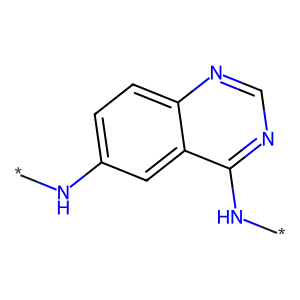

In [8]:
dm.to_image(scaffold)

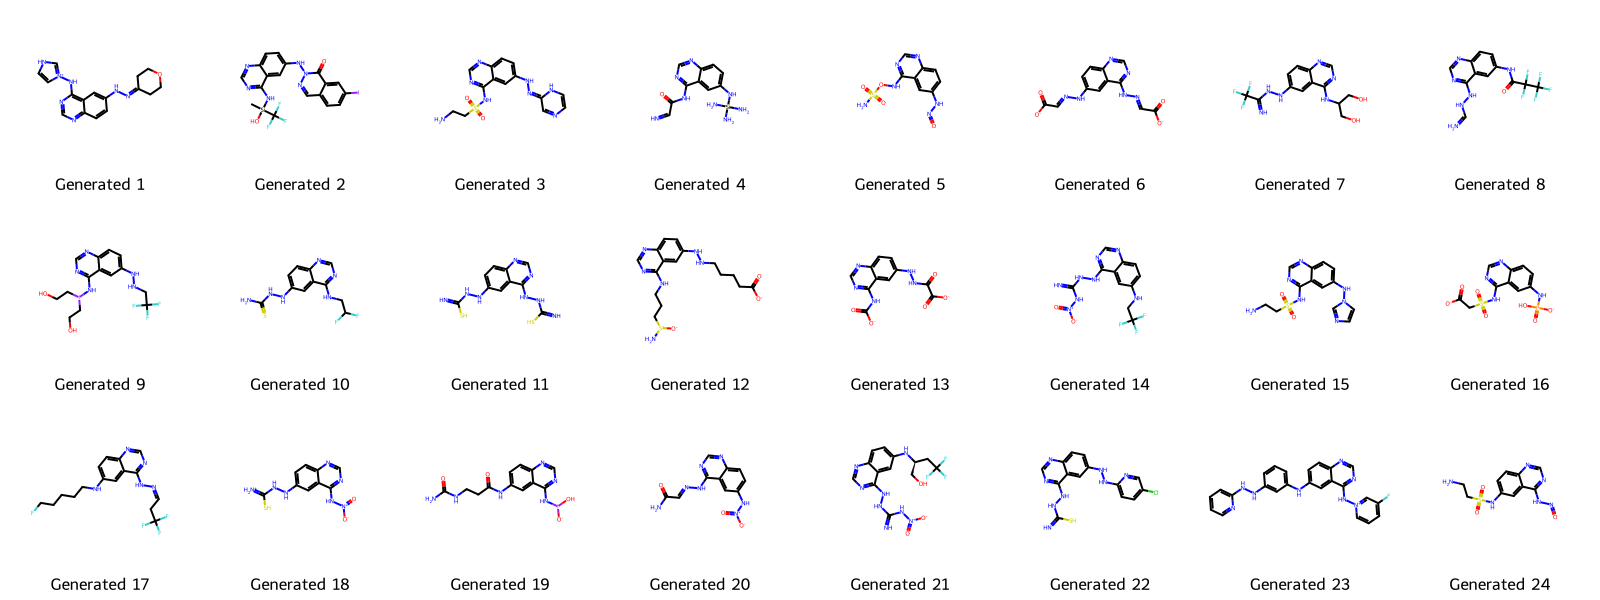

In [9]:
from rdkit.Chem import Draw

Draw.MolsToGridImage(
    [dm.to_mol(smiles) for smiles in generated_smiles],
    molsPerRow=8,
    subImgSize=(200, 200),
    legends=[f"Generated {i+1}" for i in range(len(generated_smiles))])

# Linker Generation

In [24]:
fragment1 = "C1(=*)C(*)=C(*)NC12OCCO2"
fragment2 = "c1(*)c(*)sc2c1CCNC2"

# Generate molecules with linkers
generated_smiles_linker = designer.linker_generation(
    fragment1,
    fragment2,
    n_samples_per_trial=12, # Number of molecules to attempt generating
    n_trials=1,             # Number of generation trials
    sanitize=True,          # Ensure chemical validity
    do_not_fragment_further=False, # Allow generated linker to be fragmented if needed
    random_seed=42          # For reproducibility
)

print(f"Generated {len(generated_smiles_linker)} molecules via linker generation.")
print(generated_smiles_linker[:5])

2025-06-27 16:38:55.392 | INFO     | safe.sample:_fragment_linking:490 - After sanitization, 12 / 12 (100.00 %)  generated molecules are valid !


Generated 12 molecules via linker generation.
['*C1=C(N2CCN(c3sc4c(c3*)CCNC4)CC2)NC2(OCCO2)C1=*', '*C1=C(N2CCN(c3sc4c(c3*)CCNC4)CC2)NC2(OCCO2)C1=*', '*C1=C(N2CCN(c3c(*)sc4c3CCNC4)CC2)NC2(OCCO2)C1=*', '*C1=C(N2CCN(c3c(*)sc4c3CCNC4)CC2)NC2(OCCO2)C1=*', '*C1=C(N2CCN(c3sc4c(c3*)CCNC4)CC2)C(=*)C2(N1)OCCO2']


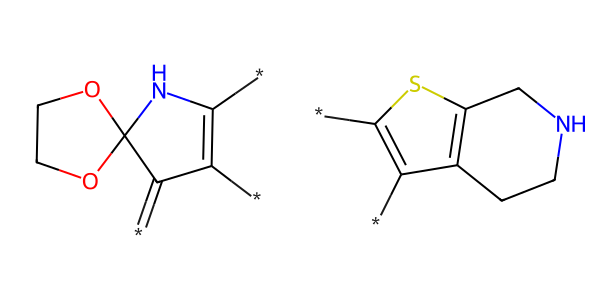

In [25]:
dm.to_image([fragment1, fragment2])

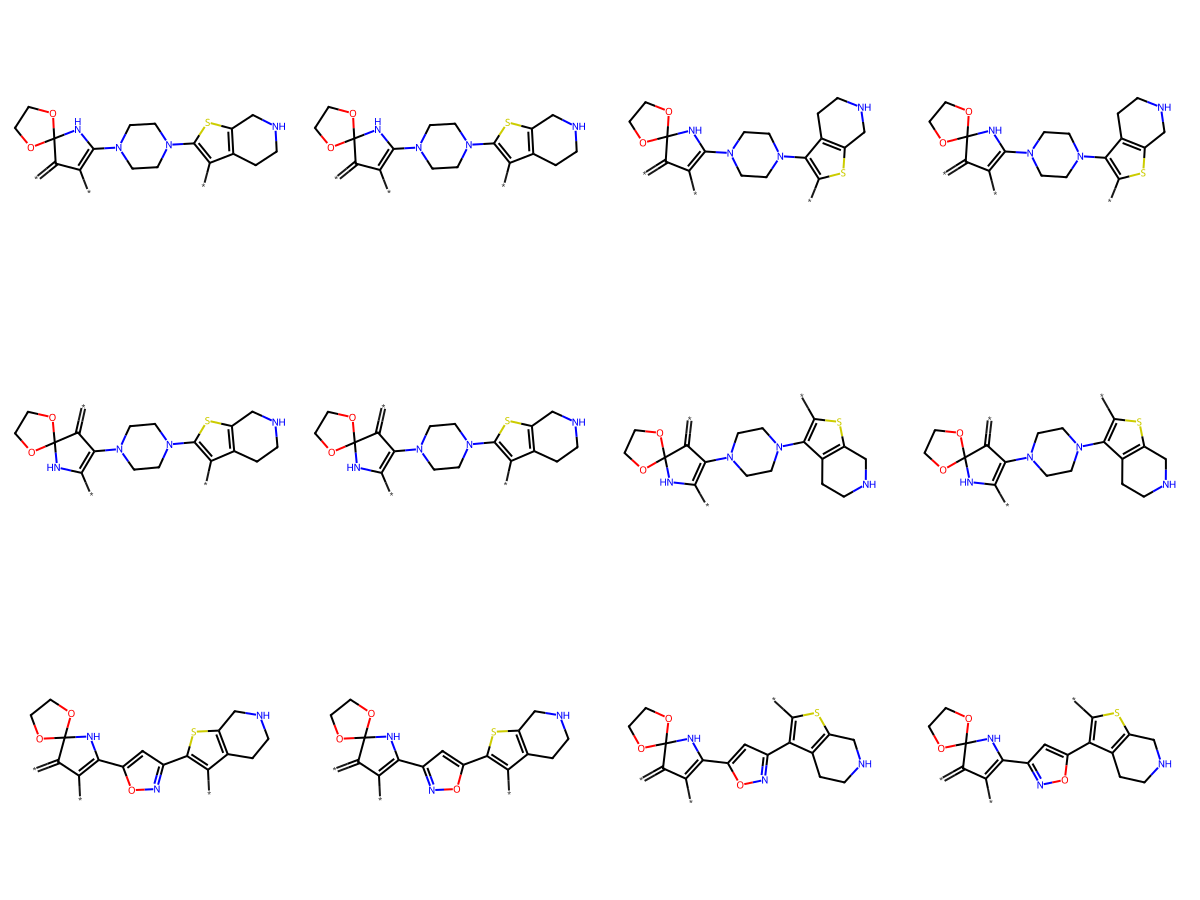

In [26]:
dm.to_image(generated_smiles_linker[0:12])

# Scaffold Morphing

In [12]:
# Define the side chains to be connected by a new scaffold
# Attachment points are numbered ([1*], [2*], etc.)
side_chains = "[1*]C(=O)C#CCN1CCCCC1.[2*]c1cccc(Br)c1"

# Generate molecules with new scaffolds connecting the side chains
generated_smiles_morphing = designer.scaffold_morphing(
    side_chains=side_chains,
    n_samples_per_trial=12,
    n_trials=1,
    sanitize=True,
    do_not_fragment_further=False,
    random_seed=43
)

print(f"Generated {len(generated_smiles_morphing)} molecules via scaffold morphing.")
print(generated_smiles_morphing[:5])

2025-06-25 16:38:52.833 | INFO     | safe.sample:_fragment_linking:490 - After sanitization, 8 / 12 (66.67 %)  generated molecules are valid !


Generated 8 molecules via scaffold morphing.
['O=C(C#CCN1CCCCC1)n1c(-c2cccc(Br)c2)c(F)c(=[Cl+])c(=[F+])c2ccccc21', 'O=C(C#CCN1CCCCC1)c1c(F)c(=[Cl+])c(=[F+])c2ccccc2n1-c1cccc(Br)c1', 'Cc1cc(C)c(C(=O)C#CCN2CCCCC2)c(-c2cccc(Br)c2)c1', 'Cc1cc(C)c(-c2cccc(Br)c2)c(C(=O)C#CCN2CCCCC2)c1', 'O=C(C#CCN1CCCCC1)C=[O+]c1cccc(Br)c1']
